In [17]:
import os
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def load_img(img, mode='RGB'):
    base_path = './../image'
    if mode == 'RGB':
        img = cv.imread(os.path.join(base_path, img))
    else:
        img = cv.imread(os.path.join(base_path, img), cv.IMREAD_GRAYSCALE)

    if img is None:
        print('Image load failed!')
        sys.exit()
    return img
    
def show_imgs(imgs, name='img',mode='RGB'):
    plt.figure(figsize=(12, 10))
    t_len = len(imgs)
    if mode == 'RGB':
        for i, img in enumerate(imgs):
            plt.subplot(1, t_len, i+1)
            plt.imshow(img)
            plt.xticks([])
            plt.yticks([])
    else:
        for i, img in enumerate(imgs):
            plt.subplot(1, t_len, i+1)
            plt.imshow(img, cmap='gray')
            plt.xticks([])
            plt.yticks([])
    
    plt.show()


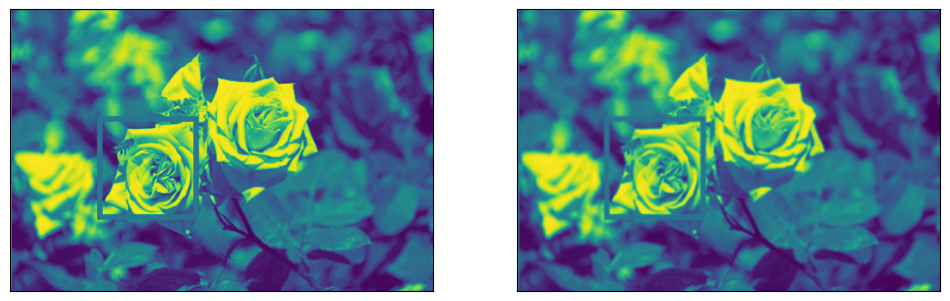

In [18]:
src = load_img('rose.bmp', 'g')
dst = cv.blur(src,(3,3))

show_imgs([src, dst], 'g')

In [20]:
src = load_img('rose.bmp', 'g')
cv.imshow('src', src)

for ksize in (3, 5, 7):
    dst = cv.blur(src, (ksize, ksize))
    desc = 'Mean: {}x{}'.format(ksize, ksize)
    cv.putText(dst, desc, (10, 30), cv.FONT_HERSHEY_SIMPLEX,
               1.0, 0, 1, cv.LINE_AA)

    cv.imshow('dst', dst)
    cv.waitKey(0)
cv.destroyAllWindows()